### Import libraries and get data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.arima.model import ARIMA

## Load the dataset

In [67]:
# Load the dataset
df = pd.read_csv("./ETH.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-12-01,460.67
2017-12-02,455.51
2017-12-03,459.49
2017-12-04,465.00
2017-12-05,451.87
...,...
2023-06-12,1742.60
2023-06-13,1739.60
2023-06-14,1650.96


### Split the data into training, test and validate sets

In [68]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [69]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [70]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


## ARIMA Model

### 3. Perfom ARIMA Model 

In [71]:
!pip install pmdarima

In [72]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

### 3.1 Build the best ARIMA Model using p,d,q from auto_arima

In [73]:
arima_model = pmd.auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic


C:\Users\PHUTRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11917.210, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11913.436, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11915.436, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11915.436, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11912.588, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.177 seconds


In [74]:
order = (arima_model.order[0], arima_model.order[1], arima_model.order[2])
print(order)

(0, 1, 0)


In [75]:
def evaluate_ariama_model(x_data, y_data, order):
    y_preds = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_preds.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_preds)
    mae = mean_absolute_error(y_data, y_preds)
    mape = mean_absolute_percentage_error(y_data, y_preds)
    rmse = mean_squared_error(y_data, y_preds, squared=False)
    return y_preds, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [76]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_ariama_model(x_val, y_val, order)

print("Price predict on validate data:", y_pred_val)

Price predict on validate data: [1686.8, 2636.0299999999997, 2519.98, 2229.1000000000004, 2342.3, 2080.79, 1955.36, 2009.53, 2056.3, 2145.86, 2022.9300000000003, 2091.14, 1912.12, 2019.34, 1959.85, 1975.12, 2043.19, 1972.93, 1979.35, 1942.91, 1793.42, 1724.3, 1792.68, 1813.56, 1998.46, 1941.79, 1818.07, 1834.64, 1775.29, 1804.37, 1806.71, 1859.99, 1813.72, 1793.0, 1788.06, 1663.02, 1531.42, 1435.46, 1206.67, 1210.84, 1237.92, 1068.49, 1086.47, 995.6099999999999, 1128.39, 1128.32, 1125.96, 1049.02, 1144.19, 1225.03, 1241.76, 1198.03, 1190.84, 1143.97, 1099.51, 1069.05, 1058.94, 1066.6, 1074.08, 1151.19, 1133.9, 1186.45, 1238.15, 1216.33, 1216.94, 1167.35, 1096.43, 1038.56, 1115.83, 1192.75, 1231.03, 1356.08, 1337.85, 1584.77, 1543.5, 1520.64, 1575.68, 1534.85, 1549.61, 1598.19, 1438.52, 1450.7, 1636.01, 1726.01, 1720.77, 1695.97, 1680.0, 1630.1, 1631.48, 1618.08, 1606.94, 1737.71, 1690.27, 1700.29, 1778.42, 1702.8, 1853.46, 1880.28, 1957.63, 1983.5, 1935.1, 1900.25, 1876.7, 1834.18, 184

### 3.3 Evaluate on Test data

In [77]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred_test)

Price predict on test data: [1686.8, 1816.69, 1841.01, 1917.99, 1967.96, 2134.55, 2008.59, 2075.94, 2106.41, 2111.53, 1961.46, 2079.92, 2066.93, 2133.79, 2151.42, 2137.81, 2299.93, 2431.56, 2514.22, 2423.18, 2318.33, 2237.17, 2160.63, 2332.14, 2360.81, 2401.1, 2367.31, 2215.93, 2316.48, 2533.12, 2665.24, 2746.54, 2757.36, 2772.78, 2944.66, 2950.33, 3429.37, 3286.71, 3522.76, 3489.52, 3481.22, 3905.55, 3922.23, 3947.9, 4167.78, 3811.77, 3719.62, 4075.38, 3641.65, 3582.12, 3279.68, 3377.55, 2435.69, 2777.55, 2433.1100000000006, 2291.6, 2101.34, 2646.79, 2705.09, 2884.66, 2735.88, 2414.29, 2276.07, 2386.1, 2708.47, 2633.67, 2706.1, 2853.35, 2686.5, 2628.98, 2713.66, 2592.63, 2510.65, 2606.23, 2469.97, 2351.45, 2368.47, 2508.27, 2581.48, 2543.83, 2367.28, 2371.62, 2229.53, 2166.91, 2243.86, 1891.18, 1876.66, 1968.39, 1989.14, 1810.5699999999997, 1830.62, 1979.88, 2083.09, 2158.71, 2273.84, 2109.11, 2154.78, 2224.7, 2323.22, 2196.16, 2322.72, 2316.57, 2120.22, 2145.89, 2111.12, 2139.35, 203

### 3.4 Predict price for the next 30 days

In [78]:
last_index = len(df)

date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = list()
history = [x for x in y_val]
for t in range(len(x_next_30_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_30_days.append(yhat)
    obs = y_val[t]
    history.append(obs)
    
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1675.16, 2636.03, 2519.98, 2229.1, 2342.3, 2080.79, 1955.3599999999997, 2009.53, 2056.3, 2145.86, 2022.93, 2091.14, 1912.1199999999997, 2019.34, 1959.85, 1975.12, 2043.19, 1972.93, 1979.35, 1942.91, 1793.42, 1724.3000000000002, 1792.68, 1813.56, 1998.46, 1941.79, 1818.07, 1834.64, 1775.29, 1804.37]


### 4.  Evaluate accuracy validate, test data

In [79]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

                   MSE         MAE      MAPE       RMSE
Validate   6364.932971   46.082069  0.029127   79.78053
Test      23145.822079  111.974356  0.037153  152.13751


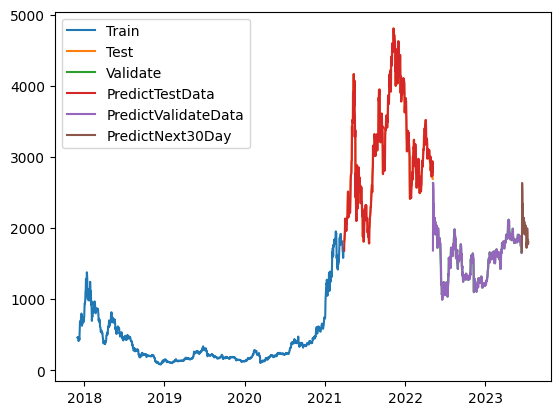

In [80]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(date_range, y_next_30_days)

plt.legend(['Train', 'Test', 'Validate','PredictTestData', 'PredictValidateData','PredictNext30Day'])
plt.show()